# 1. Graficar todas las combinaciones por pares de la Iris-DB en Python

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Importing Iris data set

In [184]:
iris=pd.read_csv('Iris.csv')

### Displaying data

In [185]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [186]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

This data set has three varities of Iris plant.

In [187]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


## Removing the unneeded column

In [188]:
iris.drop(columns="Id",inplace=True)

c:\Users\Aydee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


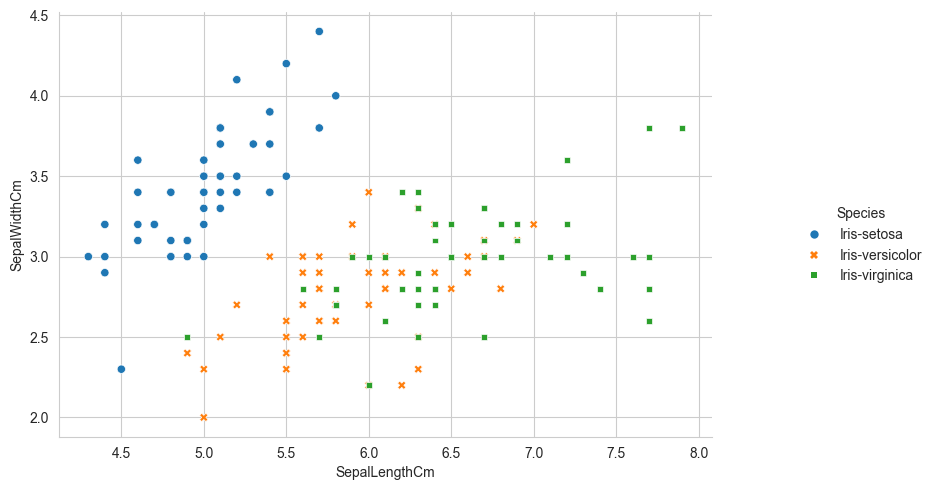

In [189]:
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

c:\Users\Aydee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


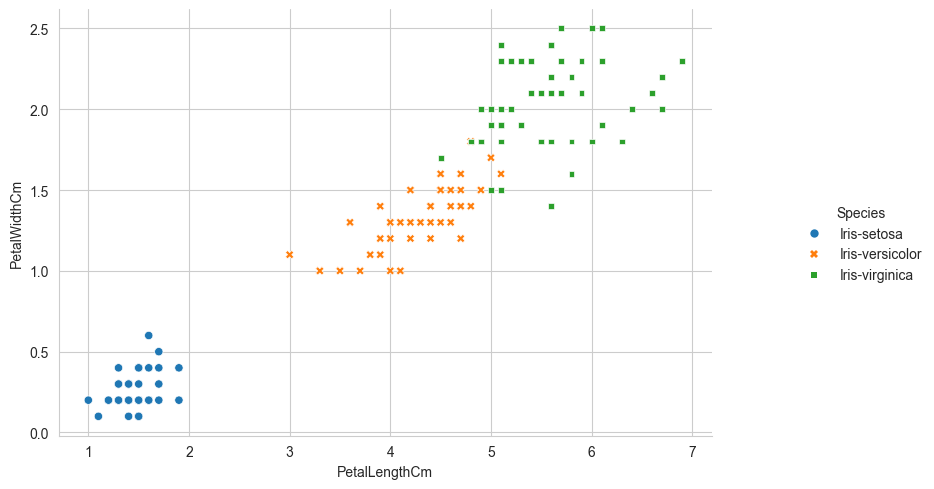

In [190]:
g=sns.relplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

c:\Users\Aydee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


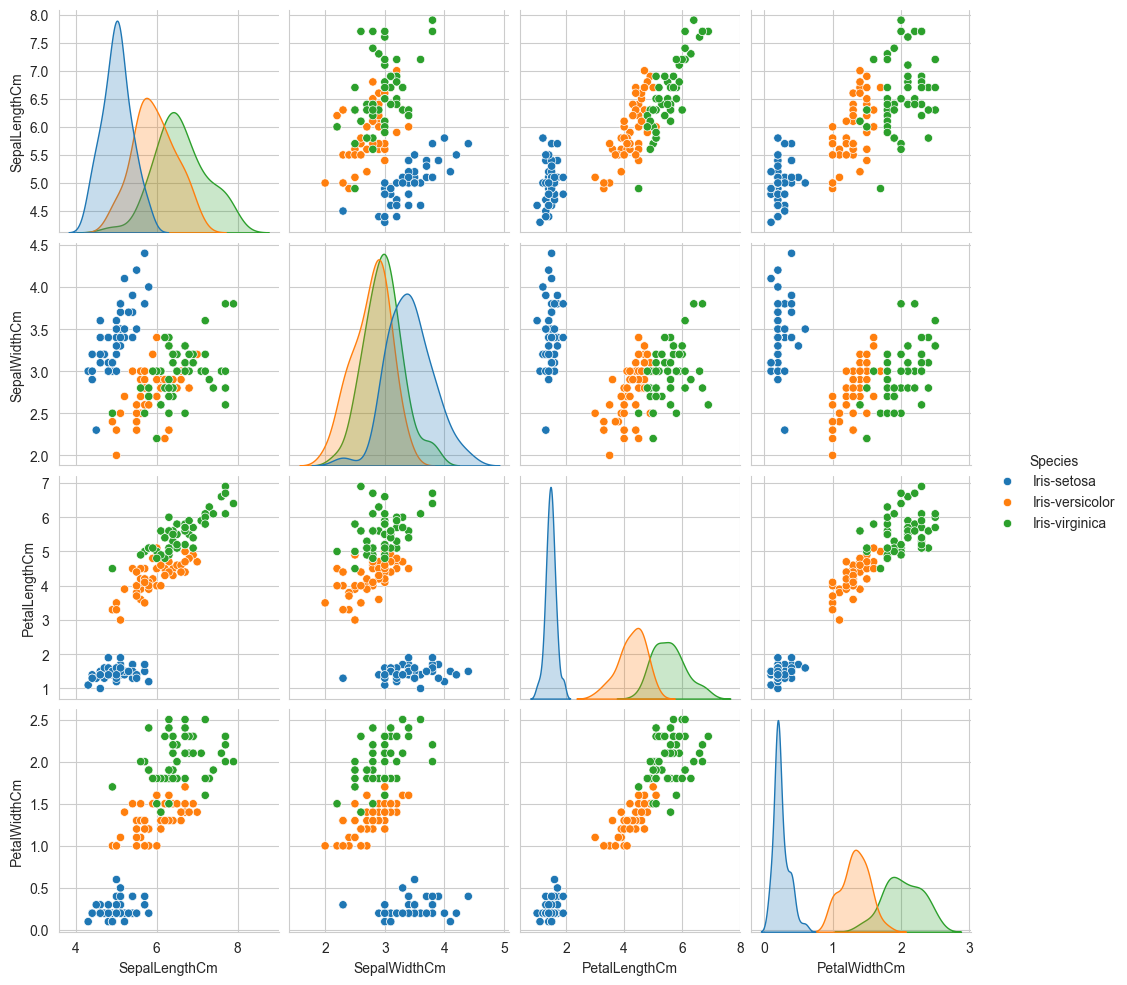

In [191]:
sns.pairplot(iris,hue="Species")
plt.show()

In [192]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


In [193]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]
accuracy_SVC: 0.933
precision_SVC: 0.933
recall_SVC: 0.933
f1-score_SVC : 0.933


c:\Users\Aydee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [194]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_DecisionTree: 0.978
precision_DecisionTree: 0.978
recall_DecisionTree: 0.978
f1-score_DecisionTree : 0.978


# 2. Escoger una de las combinaciones anteriores para trabajar (1 par) y crear un conjunto de entrenamiento (train 50% de cada clase) y de prueba (test 50%) y graficar ambos conjuntos.

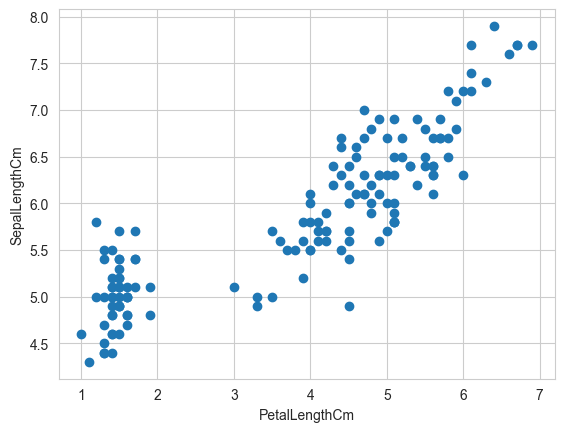

In [195]:
plt.scatter(iris['PetalLengthCm'],iris['SepalLengthCm'])
plt.xlabel('PetalLengthCm')
plt.ylabel('SepalLengthCm')
plt.show()

In [196]:
train_data = []
test_data = []
def split_and_plot_data(df):
    # Ensure the DataFrame is sorted by Species
    df = df.sort_values('Species')

    # Create a dictionary for each unique species with its corresponding data
    data_dict = dict(tuple(df.groupby('Species')))

    # Iterate through each species and split its data
    for species, group_df in data_dict.items():
        train, test = train_test_split(
            group_df, test_size=0.5, stratify=group_df['Species'])

        # Append the train and test iriss
        train_data.append(train)
        test_data.append(test)

    # Combine the train and test iriss
    train_df = pd.concat(train_data)
    test_df = pd.concat(test_data)

    # Plot the train and test datasets using Seaborn
    sns.set_style('whitegrid')
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=train_df)
    sns.scatterplot(
        x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=test_df, marker='x')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Training and Testing Datasets (50% split)')
    plt.show()
    

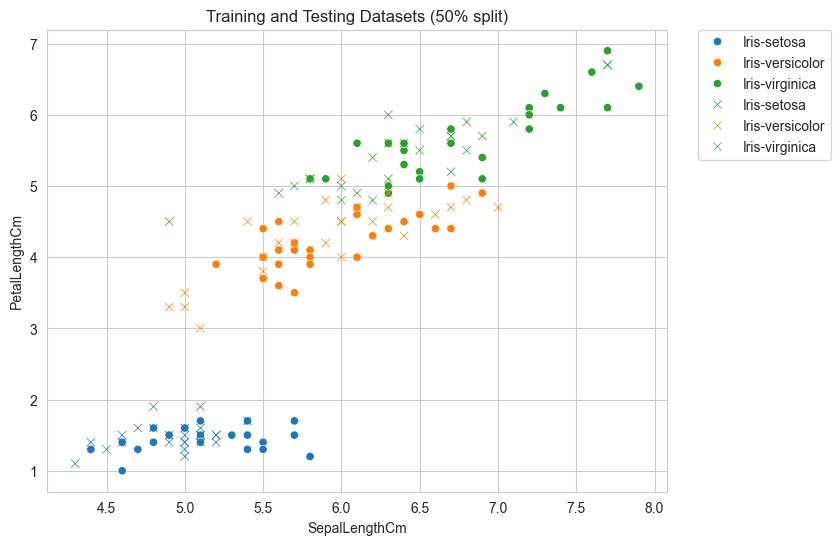

In [197]:
split_and_plot_data(iris)

# 3. Realizar en entrenamiento y clasificación para las 3 clases por el método de Bayes Ingenuo, usando las ecuaciones de la campana de Gauss visto en clases (NO usar toolbox NI funciones que gaussianicen directamente)

In [198]:
from random import seed
from random import randrange
from math import sqrt
from math import exp
from math import pi

# Convert string column to float
def str_column_to_float(iris, column):
	for row in iris:
		row[column] = float(row[column].strip())


# Convert string column to integer
def str_column_to_int(iris, column):
	class_values = [row[column] for row in iris]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in iris:
		row[column] = lookup[row[column]]
	return lookup


# Split a dataset into k folds
def cross_validation_split(iris, n_folds):
	dataset_split = list()
	dataset_copy = list(iris)
	fold_size = int(len(iris) / n_folds)
	for _ in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(iris, algorithm, n_folds, *args):
	folds = cross_validation_split(iris, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Split the dataset by class values, returns a dictionary
def separate_by_class(iris):
	separated = dict()
	for i in range(len(iris)):
		vector = iris[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))

# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(iris):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*iris)]
	del(summaries[-1])
	return summaries

# Split dataset by class then calculate statistics for each row
def summarize_by_class(iris):
	separated = separate_by_class(iris)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, _ = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities

# Predict the class for a given row
def predict(summaries, row):
	probabilities = calculate_class_probabilities(summaries, row)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label

# Naive Bayes Algorithm
def naive_bayes(train, test):
	summarize = summarize_by_class(train)
	predictions = list()
	for row in test:
		output = predict(summarize, row)
		predictions.append(output)
	return(predictions)


In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

probabilidades_previas = y_train.value_counts(normalize=True)
stats_por_clase = X_train.groupby(y_train).agg(['mean', 'std'])


def probabilidad_gaussiana(x, mean, std):
    exponente = np.exp(-((x-mean)**2 / (2 * std**2)))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponente


def calcular_prob_posterior(X):
    probabilidades_posteriores = []
    
    for index, row in X.iterrows():
        probabilidad_clase = {}
        for clase, stats in stats_por_clase.iterrows():
            probabilidad_clase[clase] = probabilidades_previas[clase]
            
            for col in X.columns:
                probabilidad_clase[clase] *= probabilidad_gaussiana(row[col], stats[col]['mean'], stats[col]['std'])
        probabilidades_posteriores.append(probabilidad_clase)
    return probabilidades_posteriores

# Recalcular todo y hacer predicciones
probabilidades_posteriores = calcular_prob_posterior(X_test)
y_pred = [max(probs, key=probs.get) for probs in probabilidades_posteriores]

# Mostrar las primeras 5 predicciones
y_pred[:5]


AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

from sklearn.model_selection import train_test_split

X = iris_df[['petal length (cm)', 'petal width (cm)']]
y = iris_df['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [210]:
import numpy as np

probabilidades_previas = y_train.value_counts(normalize=True)
stats_por_clase = X_train.groupby(y_train).agg(['mean', 'std'])


def probabilidad_gaussiana(x, mean, std):
    exponente = np.exp(-((x-mean)**2 / (2 * std**2)))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponente


def calcular_prob_posterior(X):
    probabilidades_posteriores = []
    
    for index, row in X.iterrows():
        probabilidad_clase = {}
        for clase, stats in stats_por_clase.iterrows():
            probabilidad_clase[clase] = probabilidades_previas[clase]
            
            for col in X.columns:
                probabilidad_clase[clase] *= probabilidad_gaussiana(row[col], stats[col]['mean'], stats[col]['std'])
        probabilidades_posteriores.append(probabilidad_clase)
    return probabilidades_posteriores

# Recalcular todo y hacer predicciones
probabilidades_posteriores = calcular_prob_posterior(X_test)
y_pred = [max(probs, key=probs.get) for probs in probabilidades_posteriores]

# Mostrar las primeras 5 predicciones
y_pred[:5]


C:\Users\Aydee\AppData\Local\Temp\ipykernel_25448\2722059958.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_por_clase = X_train.groupby(y_train).agg(['mean', 'std'])


['setosa', 'setosa', 'setosa', 'setosa', 'virginica']

# 4.


In [ ]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

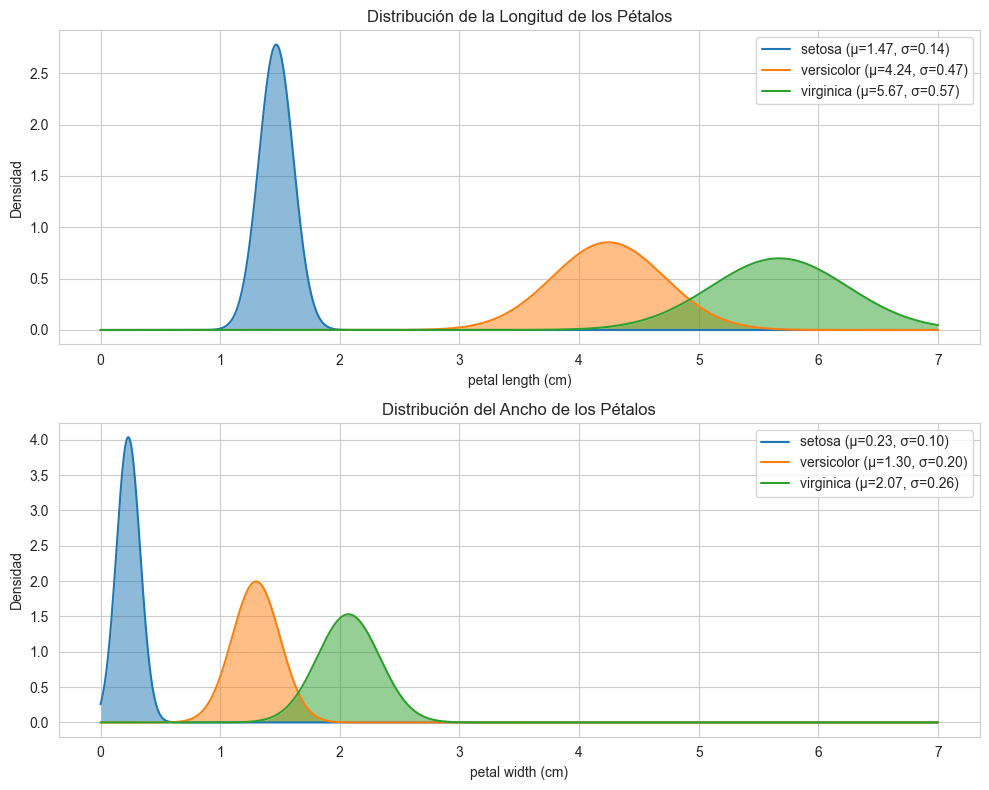

In [211]:
from scipy.stats import norm

x_range = np.linspace(0, 7, 1000)

# Crear las gráficas de las gaussianas para cada clase y característica
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Títulos para las gráficas
titles = ['Distribución de la Longitud de los Pétalos', 'Distribución del Ancho de los Pétalos']
features = ['petal length (cm)', 'petal width (cm)']

for i, feature in enumerate(features):
    for clase in iris.target_names:
        # Obtener la media y la desviación estándar para la clase y característica actual
        mean = stats_por_clase.loc[clase, feature]['mean']
        std = stats_por_clase.loc[clase, feature]['std']
        
        # Calcular la PDF gaussiana para el rango definido
        y = norm.pdf(x_range, mean, std)
        
        # Graficar
        axes[i].plot(x_range, y, label=f'{clase} (μ={mean:.2f}, σ={std:.2f})')
        axes[i].fill_between(x_range, y, alpha=0.5)
    
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Densidad')
    axes[i].legend()

plt.tight_layout()
plt.show()

# 5.


In [ ]:
test_data0= np.zeros(25)
test_data1 = np.ones(25)
test_data2 = np.full(25, 2)

test_data01= np.concatenate((test_data0, test_data1))
test_data12= np.concatenate((test_data1, test_data2))
test_data02= np.concatenate((test_data0, test_data2))



TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

ACC = (TP+TN)/(TP+FN+TN+FP)



array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])